`binary classification`

`Multiclass classification`

`Multilabel classification`

What we are going to cover

- Architecture of neural network classification model 

- Input shapes and output shapes if a classification model (feature nad labels)

- Creating custom data to view and fit

- Steps in modelling (create model, compiling a model, fitting model, evaluating model)

- Different `classification` evaluation methods

- Saving and loading models

input shape: `[batch_size,width,height,colour_channels]` (32 is very common batch size)

  - Shape: [32,244,244,3]
  
  - Shape: [None,244,244,3]
  
out shape: [class number]



In [1]:
from sklearn import datasets

In [2]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [7]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise = 0.03, random_state = 42)

In [8]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
# Visualize datasets
import pandas as pd 

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


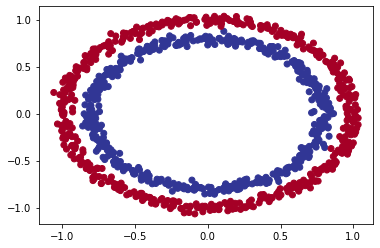

In [15]:
import matplotlib.pyplot as plt 

plt.scatter(X[:,0],X[:,1],c=y, cmap =plt.cm.RdYlBu)
plt.show()

## Input shapes and output shapes

In [16]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [17]:
# Check how many samples we are working with
len(X),len(y)

(1000, 1000)

In [18]:
# view the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typycally:

1. Create or import a model

2. Compile the model

3. Fit the model

4. Evaluate the model

5. Tweak model

In [27]:
# split the datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [20]:
import tensorflow as tf

In [28]:
# Set the random seed
tf.random.set_seed(42)

# create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

# fit the model
history = model_1.fit(X_train,y_train,epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 1.4444 - accuracy: 0.4925
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.5013
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4963
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4950
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4837
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4913
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4913
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4875
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4787
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5225
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4950
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4888
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4638
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4888
Epoch 90/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5213
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4988
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5025
Epoch 93/100


<AxesSubplot:>

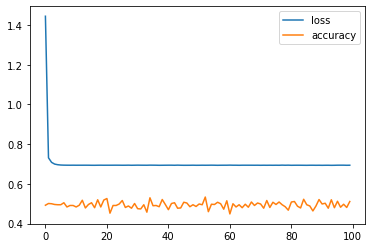

In [29]:
pd.DataFrame(history.history).plot()

In [33]:
# let evaluate
model_1.evaluate(X_test,y_test,verbose =1)

7/7 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4800


[0.6944702863693237, 0.47999998927116394]

Since we are working on a binary classification problem and our model is getting around ~50% accuaracy... It's performing as i am guessing,
So let's step things up a notch and add an extra layer

In [36]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])

history = model_2.fit(X_train,y_train,epochs= 200)

Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 1.3499 - accuracy: 0.4963
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.5013
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.5025
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7076 - accuracy: 0.4988
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4975
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4988
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4950
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4975
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5088
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4988
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5175
Epoch 83/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.5013
Epoch 84/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4850
Epoch 85/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5125
Epoch 86/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4938
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4863
Epoch 88/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4588
Epoch 89/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4938
Epoch 90/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5175
Epoch 91/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4988
Epoch 92/200


25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 164/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5225
Epoch 165/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5188
Epoch 166/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4888
Epoch 167/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5113
Epoch 168/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4737
Epoch 169/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4750
Epoch 170/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5025
Epoch 171/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5038
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5050
Epoc

<AxesSubplot:>

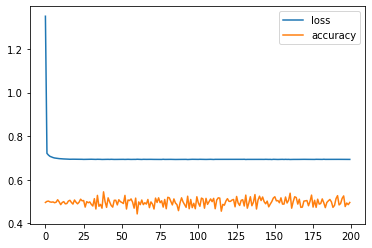

In [38]:
pd.DataFrame(history.history).plot()

In [39]:
model_2.evaluate(X_test,y_test,verbose = 1)

7/7 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4600


[0.6946614980697632, 0.46000000834465027]

## Improving model

Let's look into our bag of tricks to see how we can improve our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layers

2. Compiling a model - here we may try Adam instead of SGD

3. Fitting a model - perhaps we might fir our model for more epochs (leave it training longer)

In [41]:
circles['label'].value_counts()

0    500
1    500
Name: label, dtype: int64

In [93]:
# Set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ['accuracy'])

history = model_3.fit(X_train,y_train,epochs = 300)

Epoch 1/300
25/25 [==============================] - 1s 3ms/step - loss: 4.2659 - accuracy: 0.4425
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 4.1499 - accuracy: 0.4125
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 4.0570 - accuracy: 0.4200
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 3.9640 - accuracy: 0.4187
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 3.8122 - accuracy: 0.4162
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 3.6011 - accuracy: 0.4162
Epoch 7/300
25/25 [==============================] - 0s 5ms/step - loss: 3.4001 - accuracy: 0.4100
Epoch 8/300
25/25 [==============================] - 0s 4ms/step - loss: 3.3375 - accuracy: 0.4137
Epoch 9/300
25/25 [==============================] - 0s 4ms/step - loss: 3.2738 - accuracy: 0.4175
Epoch 10/300
25/25 [==============================] - 0s 4ms/step - loss: 3.1634 - accuracy: 0.4225
Epoch 11/

25/25 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.4400
Epoch 83/300
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4200
Epoch 84/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4175
Epoch 85/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4500
Epoch 86/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4625
Epoch 87/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4700
Epoch 88/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4762
Epoch 89/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 90/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4762
Epoch 91/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4913
Epoch 92/300


25/25 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5063
Epoch 164/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5025
Epoch 165/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 166/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5038
Epoch 167/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5050
Epoch 168/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4988
Epoch 169/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5038
Epoch 170/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 171/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5075
Epoch 172/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5113
Epoc

25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5075
Epoch 244/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4963
Epoch 245/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5038
Epoch 246/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4950
Epoch 247/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5075
Epoch 248/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5050
Epoch 249/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5075
Epoch 250/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5063
Epoch 251/300
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 252/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5000
Epoc

<AxesSubplot:>

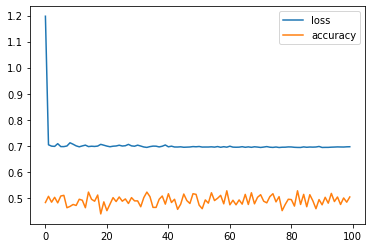

In [79]:
pd.DataFrame(history.history).plot()

In [81]:
model_3.evaluate(X_test,y_test,verbose = 1)

7/7 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4700


[0.6946241855621338, 0.4699999988079071]

In [82]:
import numpy as np

In [87]:
# Create a function to visualize your model prediction

def plot_decision_boundary(model,X,y):
    '''
    Plor the decision boundary created by a model predicting on X
    * Take in a trained model, features (X) and labels (y)
    * Ceate meshgrid of different X values
    * Make predictions across the meshgrid
    * Plot the predictions as well as line between the different zone (where each unique class falls)
    '''
    x0_min,x0_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    x1_min,x1_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    # create a meshgrid
    xx,yy  =np.meshgrid(np.linspace(x0_min,x0_max,100),
                       np.linspace(x1_min,x1_max,100))
    # create X value, we are going to make predictions on these
    x_in = np.c_[xx.ravel(),yy.ravel()]# stack 2D array together
    #Make prediction
    y_pred = model.predict(x_in)
    # Check for multi-class
    if len(y_pred[0]) >1:
        print("doing mutliclass classification")
        #We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
    else:
        print("doing binary classiffication")
        y_pred = np.round(y_pred).reshape(xx.shape)
    #Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu,alpha = 0.7)
    plt.scatter(X[:,0],X[:,1],c = y,s = 40,cmap = plt.cm.RdYlBu)
    plt.xlim(x0_min,x0_max)
    plt.ylim(x1_min,x1_max)
    plt.title("binary classiffication plot")
    plt.show()

doing binary classiffication


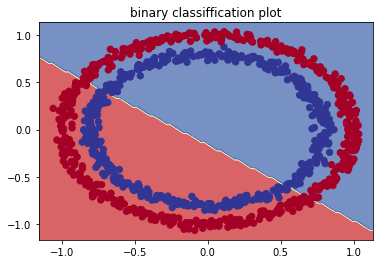

In [88]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                      X = X,
                      y = y)

In [58]:
x0_min,x0_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
x1_min,x1_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
# create a meshgrid
xx,yy  =np.meshgrid(np.linspace(x0_min,x0_max,100),
                   np.linspace(x1_min,x1_max,100))

In [60]:
xx.shape

(100, 100)

In [61]:
yy.shape

(100, 100)

In [ ]:
#https://github.com/GokuMohandas/MadeWithML

Now let change the loss function from binaryCrossentropy for classification into regression

In [109]:
# Let see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
X_regression = tf.expand_dims(X_regression,axis =-1)
y_regression = tf.range(100,1100,5)# y = x +100

#X_regression,y_regression

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [110]:
X_reg_train

<tf.Tensor: shape=(150, 1), dtype=int32, numpy=
array([[  0],
       [  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105],
       [110],
       [115],
       [120],
       [125],
       [130],
       [135],
       [140],
       [145],
       [150],
       [155],
       [160],
       [165],
       [170],
       [175],
       [180],
       [185],
       [190],
       [195],
       [200],
       [205],
       [210],
       [215],
       [220],
       [225],
       [230],
       [235],
       [240],
       [245],
       [250],
       [255],
       [260],
       [265],
       [270],
       [275],
       [280],
       [285],
       [290],
       [295],
       [300],
       [305],
       [310],
       [315],
       [320],
       [325],
       [330],
       [335],


In [111]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

# Fit our model
model_3.fit(X_reg_train,y_reg_train,epochs =100)

Epoch 1/100
5/5 [==============================] - 0s 5ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 9ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 9ms/step - loss: 38.6615 - mae: 38.6615
Epoch 87/100
5/5 [==============================] - 0s 9ms/step - loss: 38.8398 - mae: 38.8398
Epoch 88/100
5/5 [==============================] - 0s 18ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 2ms/step - loss: 38.7559 - mae: 38.7559
Epoch 90/100
5/5 [==============================] - 0s 4ms/step - loss: 38.5442 - mae: 38.5442
Epoch 91/100
5/5 [==============================] - 0s 5ms/step - loss: 38.3248 - mae: 38.3248
Epoch 92/100
5/5 [==============================] - 0s 12ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 12ms/step - loss: 39.1137 - mae: 39.1137
Epoch 94/100
5/5 [==============================] - 0s 8ms/step - loss: 38.1463 - mae: 38.1463
Epoch 95/100
5/5 [==============================] - 0s 4ms/step - loss: 38.3998 - mae: 38.3998
Epoch 96/100
5/5 [==============================] - 0s 6ms/s

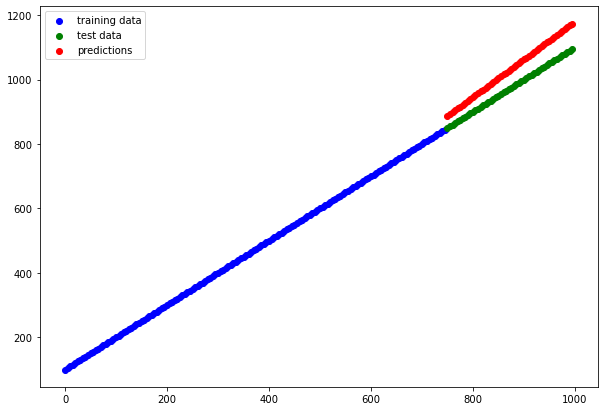

In [118]:
#Make predictions with out trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's predcitions against our regression model

plt.figure(figsize = (10,7))
plt.scatter(X_reg_train,y_reg_train,c= 'b',label = 'training data')
plt.scatter(X_reg_test,y_reg_test,c= 'g',label = 'test data')
plt.scatter(X_reg_test,y_reg_preds,c= 'r',label = 'predictions')
plt.legend()
plt.show()